# **>>> Initialization**

In [1]:
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!wget http://philip.greenspun.com/images/pcd2331/gay-head-lighthouse-1.4.jpg

--2021-11-26 09:59:09--  http://philip.greenspun.com/images/pcd2331/gay-head-lighthouse-1.4.jpg
Resolving philip.greenspun.com (philip.greenspun.com)... 97.107.134.220
Connecting to philip.greenspun.com (philip.greenspun.com)|97.107.134.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273553 (267K) [image/jpeg]
Saving to: ‘gay-head-lighthouse-1.4.jpg’

gay-head-lighthouse 100%[===================>] 267.14K  --.-KB/s    in 0.1s    

2021-11-26 09:59:10 (2.22 MB/s) - ‘gay-head-lighthouse-1.4.jpg’ saved [273553/273553]



# **>>> Actual Image**

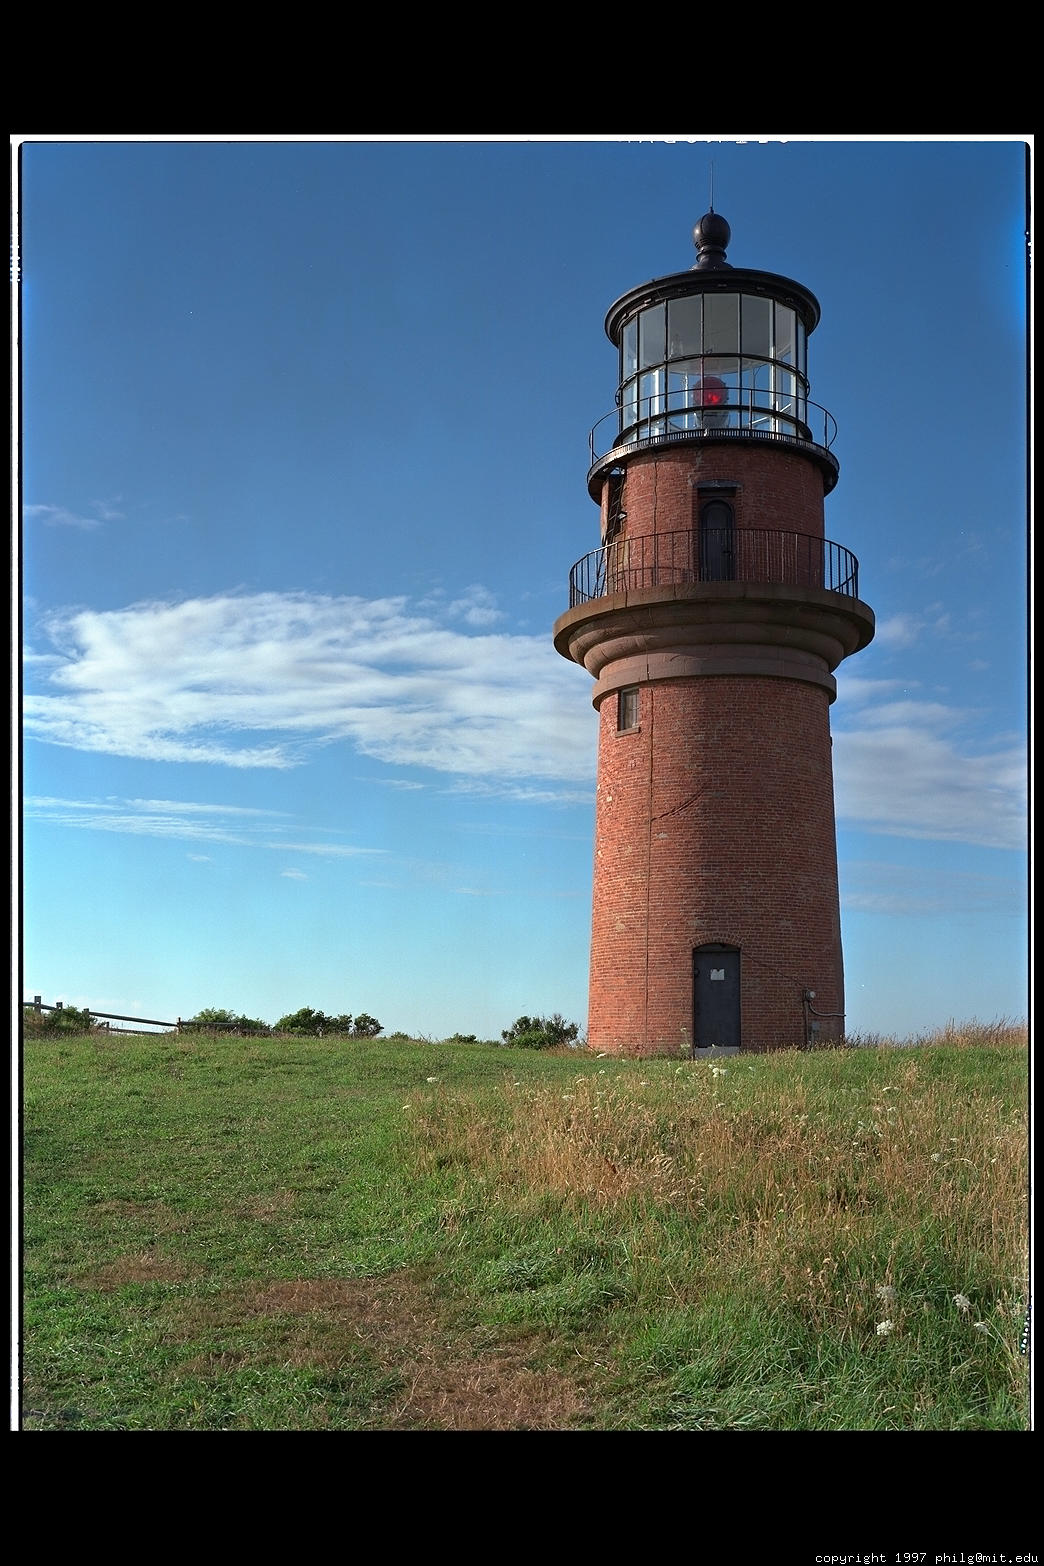

# **>>> Pre-Processing**

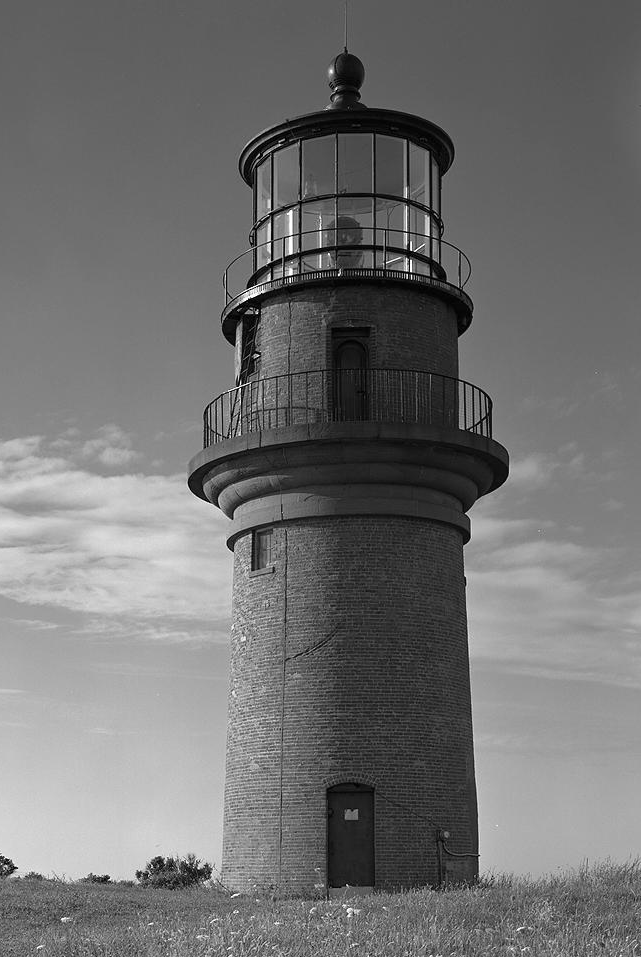

In [3]:
org_img = Image.open("gay-head-lighthouse-1.4.jpg").convert('L')
org_img = org_img.crop((366, 160, 1007, 1117))
display(org_img)
org_mat = np.array(org_img)

MF_img = org_img.filter(ImageFilter.MedianFilter(size=3))
MF_mat = np.array(MF_img)

In [4]:
row, col = org_mat.shape
for i in range(row):
  for j in range(col-1):
    org_mat[i, j] = 255 if org_mat[i, j] == org_mat[i, j+1] else 0

mod_img = Image.fromarray(org_mat)

row, col = MF_mat.shape
for i in range(row):
  for j in range(col-1):
    MF_mat[i, j] = 255 if MF_mat[i, j] == MF_mat[i, j+1] else 0

mod_MF_img = Image.fromarray(MF_mat)

# **>>> Plotting**

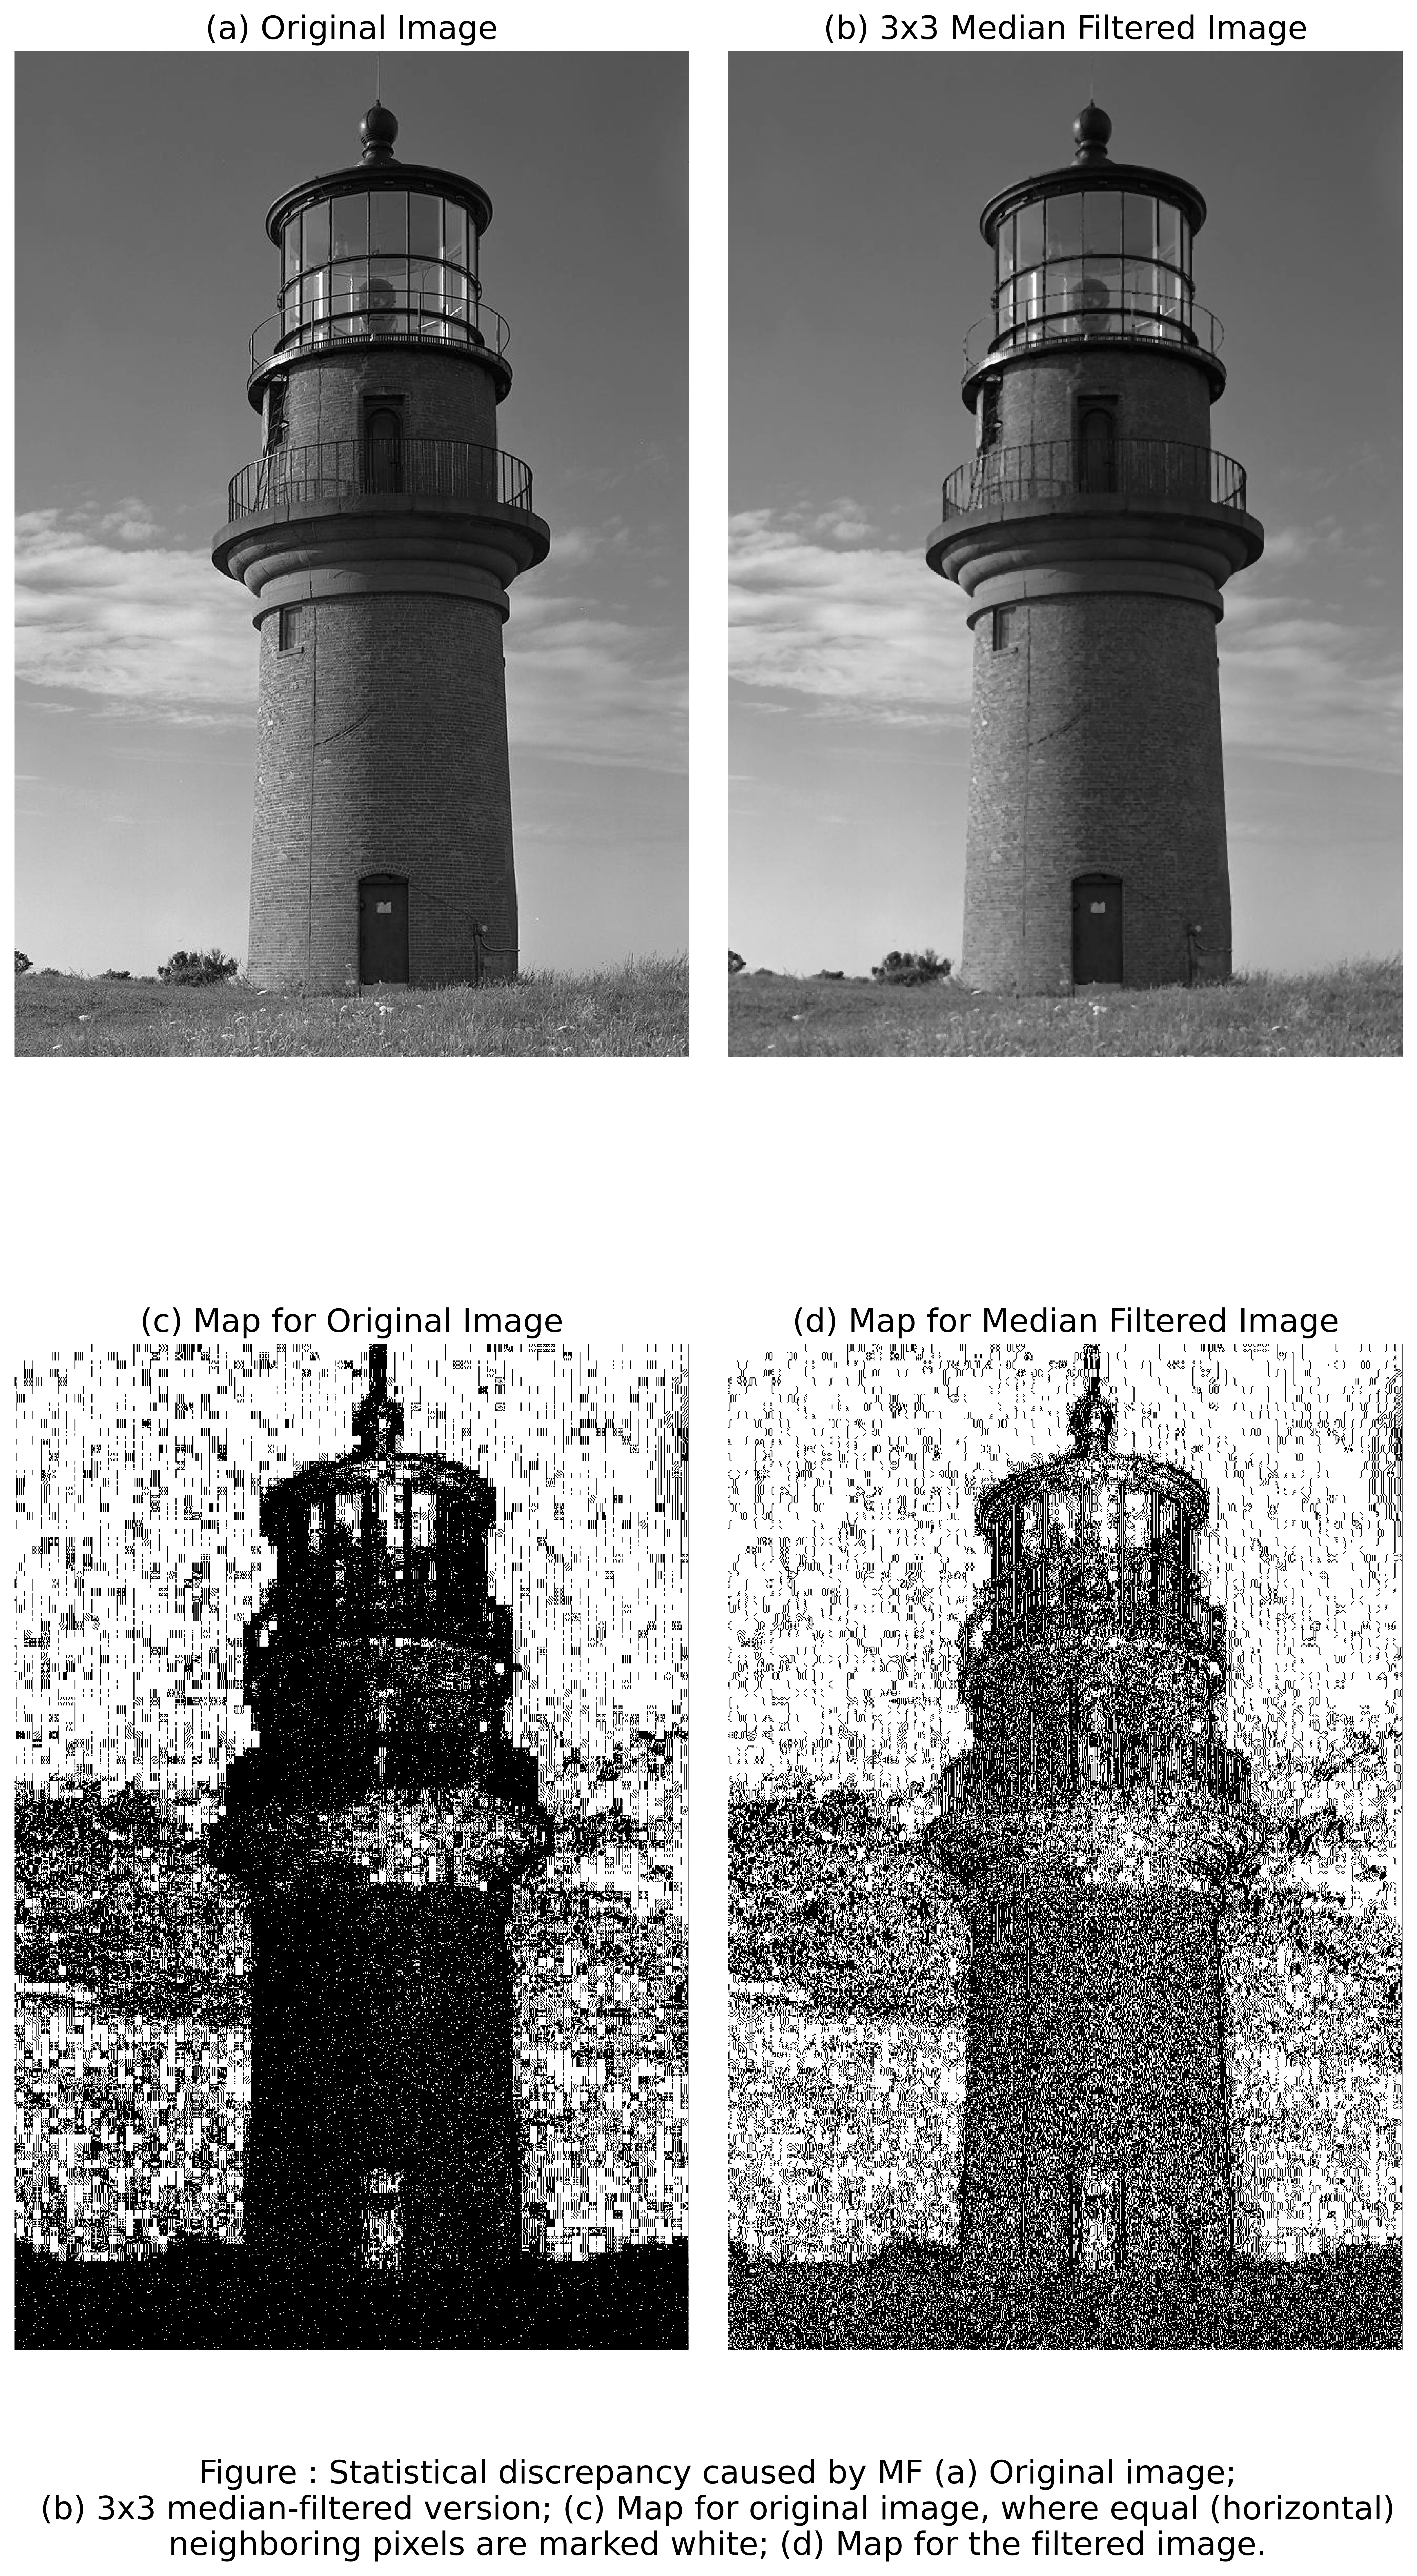

In [5]:
fig = plt.figure(figsize=(10, 19), dpi=500)

fig.add_subplot(2, 2, 1)
plt.imshow(org_img, cmap='gray')
plt.axis('off')
plt.title("(a) Original Image", fontsize=16)

fig.add_subplot(2, 2, 2)
plt.imshow(MF_img, cmap='gray')
plt.axis('off')
plt.title("(b) 3x3 Median Filtered Image", fontsize=16)

fig.add_subplot(2, 2, 3)
plt.imshow(mod_img, cmap='gray')
plt.axis('off')
plt.title("(c) Map for Original Image", fontsize=16)

fig.add_subplot(2, 2, 4)
plt.imshow(mod_MF_img, cmap='gray')
plt.axis('off')
plt.title("(d) Map for Median Filtered Image", fontsize=16)


txt='''Figure : Statistical discrepancy caused by MF (a) Original image;
(b) 3x3 median-filtered version; (c) Map for original image, where equal (horizontal)
neighboring pixels are marked white; (d) Map for the filtered image.'''
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=16)
plt.tight_layout()
plt.savefig('Lighthouse.png')
plt.show()